In [1]:
import pandas as pd

In [2]:
import sqlite3

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
con = sqlite3.connect('/content/drive/MyDrive/School21/d12/data/checking-logs.sqlite')

In [5]:
commits = pd.read_sql('''select timestamp from checker where status = 'ready' and uid like 'user_%' ''', con)

In [6]:
commits['timestamp'] = commits['timestamp'].astype('datetime64[ns]')

In [7]:
commits['dayofweek'] = pd.cut(commits.timestamp.dt.dayofweek, bins = [0,5,8], labels=['рабочие','выходные'], right=False)

In [8]:
commits['hour'] = commits.timestamp.dt.hour

In [9]:
commits['dt'] = commits.timestamp.dt.date

In [10]:
workd = commits[commits['dayofweek']=='рабочие'].groupby(['dt','hour']).count()[['timestamp']].reset_index().groupby('hour').mean()
workd

,timestamp
hour,
0,2.000000
3,1.000000
5,4.000000
6,1.000000
7,2.666667
8,2.333333
9,3.400000
10,6.800000
11,3.692308


In [11]:
weekend = commits[commits['dayofweek']=='выходные'].groupby(['dt','hour']).count()[['timestamp']].reset_index().groupby('hour').mean()
weekend

,timestamp
hour,
0,1.000000
1,3.000000
3,1.000000
5,1.000000
7,2.500000
8,4.000000
9,2.166667
10,3.750000
11,12.000000


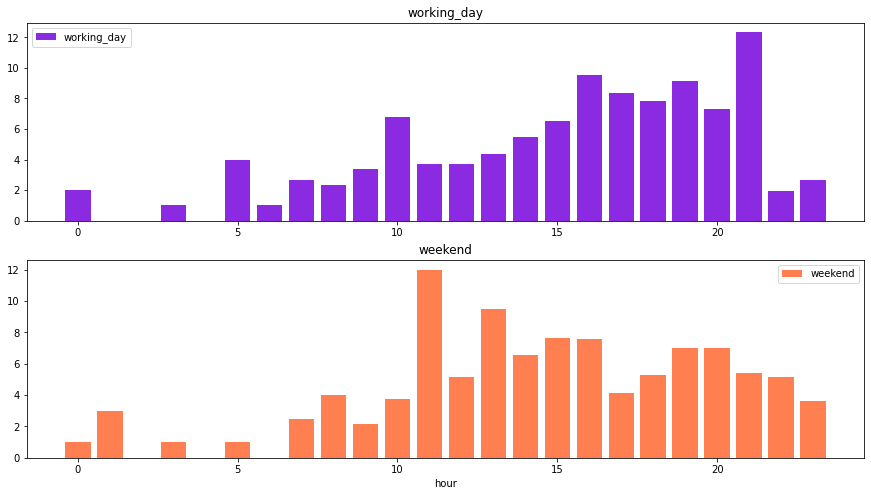

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,8))
fig1 = fig.add_subplot(2,1,1)
fig2 = fig.add_subplot(2,1,2)
fig1.bar( workd.index, workd['timestamp'], color = '#8A2BE2')
fig1.set_title('working_day')
fig2.bar( weekend.index, weekend['timestamp'], color = '#FF7F50')
fig2.set_title('weekend')
fig2.set_xlabel('hour')
fig1.legend(['working_day'])
fig2.legend(['weekend'])
plt.show()

«Отличается ли динамика в рабочие и выходные дни?». В качестве ответа добавьте значения часа, когда количество коммитов является наибольшим в рабочие дни, и часа, когда количество коммитов является наибольшим в выходные дни.

рабочие - 21

выходные - 11

In [13]:
con.close()